In [13]:
from cpclasses import *
import torch


In [14]:
def target_function(x):

    return  torch.sin(x) * x**2 + torch.randn_like(x) * 0.05 - 0.5
#Training data
xs_train = -20 * torch.rand(80, 1) + 10
ys_train = target_function(xs_train)

#Validation data
xs_validation = -20 * torch.rand(10, 1) + 10
ys_validation = target_function(xs_validation)

#Test data
xs_test = -20 * torch.rand(10, 1) + 10
ys_test = target_function(xs_test)


In [18]:
xs_train, ys_train = (
      torch.tensor([-3.5185,  4.7913, -5.7294,  6.8313, -6.1949, -2.8359,  3.5770, -9.7352,
               8.7236, -7.6444, -1.1604, -9.2950, -1.8292, -6.7322, -9.0877,  2.2723,
               2.7528,  5.6493, -5.1721,  7.4619,  2.5825,  6.7389, -3.8990, -5.9992,
              -4.8179, -0.1513,  6.4030, -1.3305, -2.6794, -9.2903, -6.6771,  9.1123,
              -6.6671, -5.1416, -6.7792,  6.6271,  2.0327, -2.4105,  0.2440,  7.1406]),
      torch.tensor([ -5.3765,  -9.0848,   2.1590,  -5.8315,   0.5031,  -3.8388,  -6.5292,
                9.6496,  -1.1439,   5.5176,  -8.8955,   4.3279,  -1.9723,   3.8308,
                6.4774,  -5.0248,  -7.7662,  -3.7932,  -1.8295,  -3.4870,  -6.7717,
               -4.3586,  -1.6717,   0.7881,  -0.4866,  -7.9941,  -8.7333,  -5.5161,
               -4.7155,   8.2325,  -1.7633,   2.4318,   1.8717,   1.8029,   2.2103,
               -4.0772,  -7.6173,  -3.6258, -10.3260,  -4.2308]))
xs_validation, ys_validation = (
    torch.tensor([-9.0973, -8.9917,  5.1596,  9.4471,  8.3714]),
    torch.tensor([ 8.7651,  5.7321, -5.7455, -0.1567, -3.6792]))
xs_test, ys_test = (
    torch.tensor([-9.9859, -1.1808, -3.3172,  7.6878,  7.2361]),
    torch.tensor([ 9.4506, -3.8572, -5.1936, -3.7723, -2.0726]))

In [19]:
training_data = CustomDataset(xs_train, ys_train)
validation_data = CustomDataset(xs_validation, ys_validation)
test_data = CustomDataset(xs_test, ys_test)




In [20]:
training_loader = DataLoader(training_data, batch_size=20, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size=20, shuffle=False)
test_loader = DataLoader(test_data, batch_size=20, shuffle=False)

loaders = {'train': training_loader, 'val': validation_loader, 'test': test_loader}

for data in validation_loader:
    print(data[0])
    print(data[1])
    

tensor([-9.0973, -8.9917,  5.1596,  9.4471,  8.3714])
tensor([ 8.7651,  5.7321, -5.7455, -0.1567, -3.6792])


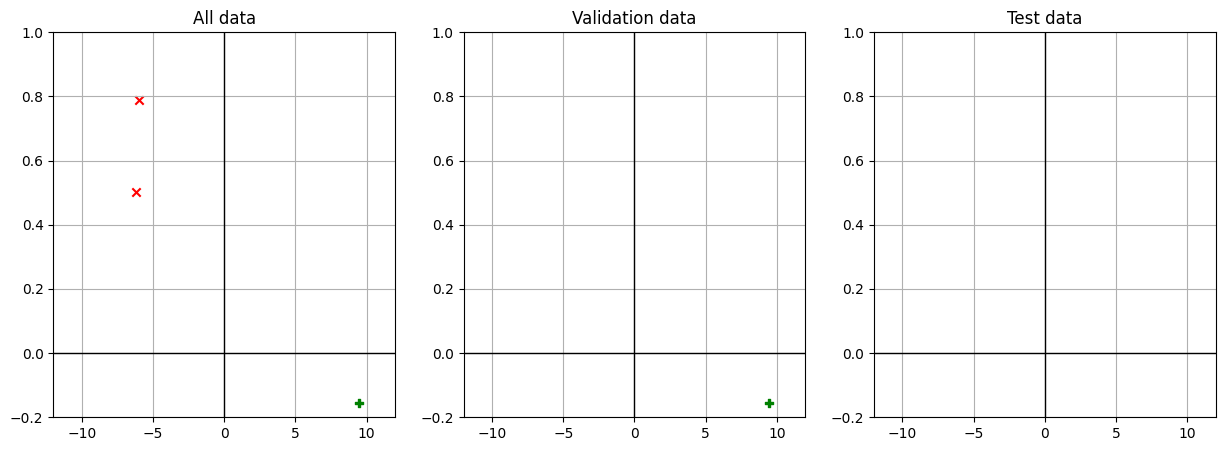

In [21]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for data in training_loader:
    axs[0].scatter(data[0], data[1], marker = 'x', label='train', color='red')
for data in validation_loader:
    axs[0].scatter(data[0], data[1], marker = 'P', label='val', color='green')
    axs[1].scatter(data[0], data[1], marker = 'P', label='val', color='green')
for data in test_loader:
    axs[0].scatter(data[0], data[1], marker = 's', label='test', color='blue')
    axs[2].scatter(data[0], data[1], marker = 's', label='test', color='blue')

axs[0].set_title('All data')
axs[1].set_title('Validation data')
axs[2].set_title('Test data')

for ax in axs:
    ax.grid()
    ax.set(xlim = (-12,12), ylim = (-0.2,1))
    coordinate_axes(ax)

In [8]:
earlyStopping = EarlyStopping(patience=10000)

CLN = CustomDeepNetwork(n_hidden=16, n_neurons=32, activation=torch.nn.GELU())
#CLN = CustomNetwork2()

In [9]:
CLN.fit_loader(training_loader, validation_loader, epochs=10000, lr = 0.5, patience=1000)

c:\Users\tobia\anaconda3\envs\py312\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\tobia\anaconda3\envs\py312\Lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0 
 Training loss: 593.1742210388184 
 Validation loss: 942.053466796875
Epoch 250 
 Training loss: nan 
 Validation loss: nan
Epoch 500 
 Training loss: nan 
 Validation loss: nan
Epoch 750 
 Training loss: nan 
 Validation loss: nan
Epoch 1000 
 Training loss: nan 
 Validation loss: nan
Epoch 1250 
 Training loss: nan 
 Validation loss: nan
Epoch 1500 
 Training loss: nan 
 Validation loss: nan
Epoch 1750 
 Training loss: nan 
 Validation loss: nan
Epoch 2000 
 Training loss: nan 
 Validation loss: nan
Epoch 2250 
 Training loss: nan 
 Validation loss: nan
Epoch 2500 
 Training loss: nan 
 Validation loss: nan
Epoch 2750 
 Training loss: nan 
 Validation loss: nan
Epoch 3000 
 Training loss: nan 
 Validation loss: nan
Epoch 3250 
 Training loss: nan 
 Validation loss: nan
Epoch 3500 
 Training loss: nan 
 Validation loss: nan
Epoch 3750 
 Training loss: nan 
 Validation loss: nan
Epoch 4000 
 Training loss: nan 
 Validation loss: nan
Epoch 4250 
 Training loss: nan 
 Validation

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Loss')]

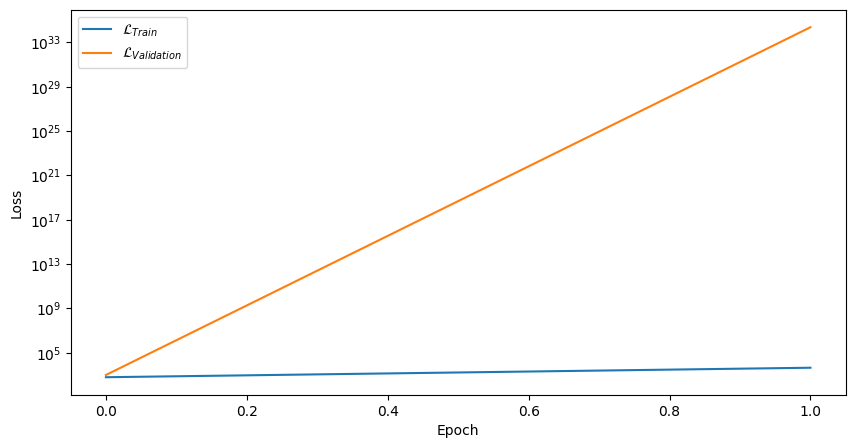

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(CLN.train_loss, label=r'$\mathcal{L}_{Train}$')
ax.plot(CLN.val_loss, label=r'$\mathcal{L}_{Validation}$')


ax.set_yscale('log')
ax.legend()
ax.set(xlabel='Epoch', ylabel='Loss')

Text(0.5, 1.0, 'Model prediction on training data')

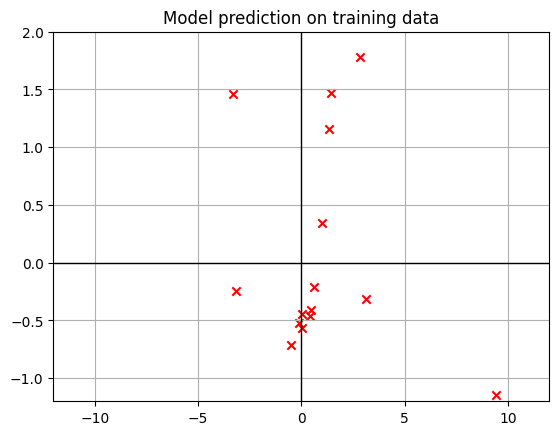

In [11]:
fig, ax = plt.subplots()

for data in training_loader:
    ax.scatter(data[0], data[1], marker = 'x', label='train', color='red')



xs = torch.linspace(-10, 10,100)

with torch.no_grad():
    ax.plot(xs, 10*CLN(xs)+4, label='model', color='blue')

ax.grid()
ax.set(xlim = (-12,12), ylim = (-1.2,2))
coordinate_axes(ax)
ax.set_title('Model prediction on training data')


